<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/synth%20ver%201.1/out-model-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/synth%20ver%201.1/out-good.csv?token=AKVFSOAHZ5RD2RJ6EWGULRS6X54TM"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/synth%20ver%201.1/out-mal.csv?token=AKVFSOGUQIZ3HTTKMQYVYKK6X54TQ"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl, nrows=30146)

Characteristics of Dataset

In [4]:
dfg

timestamp  outport  inport  ...  flit_index  vnet_vc_index  target
0             11        2       0  ...           4             10       1
1             15        2       4  ...           4             10       1
2             19        2       4  ...           4             10       1
3             22        2       0  ...           4             12       1
4             23        1       4  ...           4             10       1
...          ...      ...     ...  ...         ...            ...     ...
16498       9918        2       4  ...           8             30       1
16499       9918        1       3  ...           8             27       1
16500       9918        1       3  ...           4             10       1
16501       9918        1       4  ...          15             27       1
16502       9918        2       4  ...          15             30       1

[16503 rows x 31 columns]

In [5]:
dfm

timestamp  outport  inport  ...  flit_index  vnet_vc_index  target
0              7        2       0  ...           4             10       0
1              7        1       0  ...           4             10       0
2              8        1       0  ...           4             12       0
3              9        1       0  ...           4             14       0
4              9        2       0  ...           1             27       0
...          ...      ...     ...  ...         ...            ...     ...
30141       9917        0       0  ...           4             27       0
30142       9917        2       0  ...           4             14       0
30143       9917        2       4  ...           4              1       0
30144       9918        2       0  ...           4             16       0
30145       9918        0       3  ...           6             30       0

[30146 rows x 40 columns]

In [0]:
df = dfm.append(dfg, ignore_index=True,sort=False)

In [7]:
df.isnull().sum()

timestamp                 0
outport                   0
inport                    0
flit_id                   0
flit_type                 0
vnet                      0
vc                        0
src_ni                    0
src_router                0
dst_ni                    0
dst_router                0
router_0                  0
router_1                  0
router_2                  0
router_3                  0
router_4              16503
router_5              16503
router_6              16503
router_7                  0
router_8              16503
router_9              16503
router_10             16503
router_11                 0
router_12             16503
router_13             16503
router_14             16503
router_15                 0
hop_count                 0
current_hop               0
hop_percentage            0
enqueue_time              0
packet_count_decr         0
packet_count_incr         0
max_packet_count          0
packet_count_index        0
packet_max_index    

In [0]:
df = df.fillna(0)

In [9]:
df.isnull().sum()

timestamp             0
outport               0
inport                0
flit_id               0
flit_type             0
vnet                  0
vc                    0
src_ni                0
src_router            0
dst_ni                0
dst_router            0
router_0              0
router_1              0
router_2              0
router_3              0
router_4              0
router_5              0
router_6              0
router_7              0
router_8              0
router_9              0
router_10             0
router_11             0
router_12             0
router_13             0
router_14             0
router_15             0
hop_count             0
current_hop           0
hop_percentage        0
enqueue_time          0
packet_count_decr     0
packet_count_incr     0
max_packet_count      0
packet_count_index    0
packet_max_index      0
port_index            0
flit_index            0
vnet_vc_index         0
target                0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('out-model.csv',index=False)

In [11]:
df = pd.read_csv("out-model.csv")
df

timestamp  outport  inport  ...  flit_index  vnet_vc_index  target
0              7        2       0  ...           4             10       0
1              7        1       0  ...           4             10       0
2              8        1       0  ...           4             12       0
3              9        1       0  ...           4             14       0
4              9        2       0  ...           1             27       0
...          ...      ...     ...  ...         ...            ...     ...
46644       9918        2       0  ...           4             16       0
46645       9918        1       4  ...          15             27       1
46646       9918        0       3  ...           6             30       0
46647       9918        2       4  ...           8             30       1
46648       9918        2       4  ...          15             30       1

[46649 rows x 40 columns]

In [0]:
df = df.drop(columns=['dst_ni','dst_router'])

In [13]:
df.corr()

timestamp   outport  ...  vnet_vc_index    target
timestamp            1.000000 -0.012843  ...      -0.016920  0.026994
outport             -0.012843  1.000000  ...      -0.011059  0.174061
inport               0.013583 -0.110668  ...      -0.051585  0.204652
flit_id             -0.002483  0.001530  ...       0.687613  0.356041
flit_type            0.007823 -0.003192  ...      -0.863391 -0.443845
vnet                -0.015804 -0.005233  ...       0.975173  0.440940
vc                  -0.019843 -0.028475  ...       0.979264  0.367861
src_ni              -0.020866 -0.177164  ...      -0.104786 -0.675531
src_router          -0.020866 -0.177164  ...      -0.104786 -0.675531
router_0             0.005869  0.278625  ...       0.155537  0.280009
router_1             0.006619  0.307709  ...       0.056544  0.222804
router_2             0.008057  0.334957  ...       0.014114  0.175348
router_3             0.007886 -0.042007  ...      -0.009777  0.122313
router_4            -0.045861  0.037060  ...       0.024719 -0.023992
router_5            -0.047106  0.047959  ...       0.023177 -0.031048
router_6            -0.044738  0.053237  ...       0.033495 -0.034465
router_7             0.005354 -0.047223  ...      -0.017036  0.060599
router_8            -0.009371  0.125294  ...      -0.069458 -0.081114
router_9            -0.022499  0.135646  ...      -0.071059 -0.087815
router_10           -0.008830  0.177690  ...      -0.017488 -0.115034
router_11           -0.002866 -0.057068  ...      -0.042070 -0.038088
router_12           -0.004348  0.158107  ...      -0.014344 -0.102356
router_13           -0.002157  0.219466  ...      -0.069488 -0.142080
router_14           -0.000887  0.271447  ...      -0.072293 -0.175731
router_15            0.008088 -0.837472  ...       0.036915 -0.202156
hop_count            0.017386  0.314870  ...       0.142422  0.758782
current_hop          0.025038 -0.451542  ...       0.059096  0.415864
hop_percentage       0.013619 -0.658517  ...      -0.048210  0.054190
enqueue_time         0.059733 -0.047482  ...       0.143827 -0.180882
packet_count_decr   -0.071206 -0.012987  ...      -0.100994 -0.332122
packet_count_incr   -0.058009 -0.059562  ...      -0.119103 -0.330466
max_packet_count    -0.142885 -0.080246  ...      -0.243400 -0.732714
packet_count_index  -0.151699 -0.024947  ...      -0.116019 -0.448775
packet_max_index    -0.187445  0.008077  ...      -0.062381 -0.334434
port_index           0.006567  0.563022  ...      -0.003583  0.250495
flit_index           0.001247  0.000034  ...       0.388112  0.202750
vnet_vc_index       -0.016920 -0.011059  ...       1.000000  0.422953
target               0.026994  0.174061  ...       0.422953  1.000000

[38 rows x 38 columns]

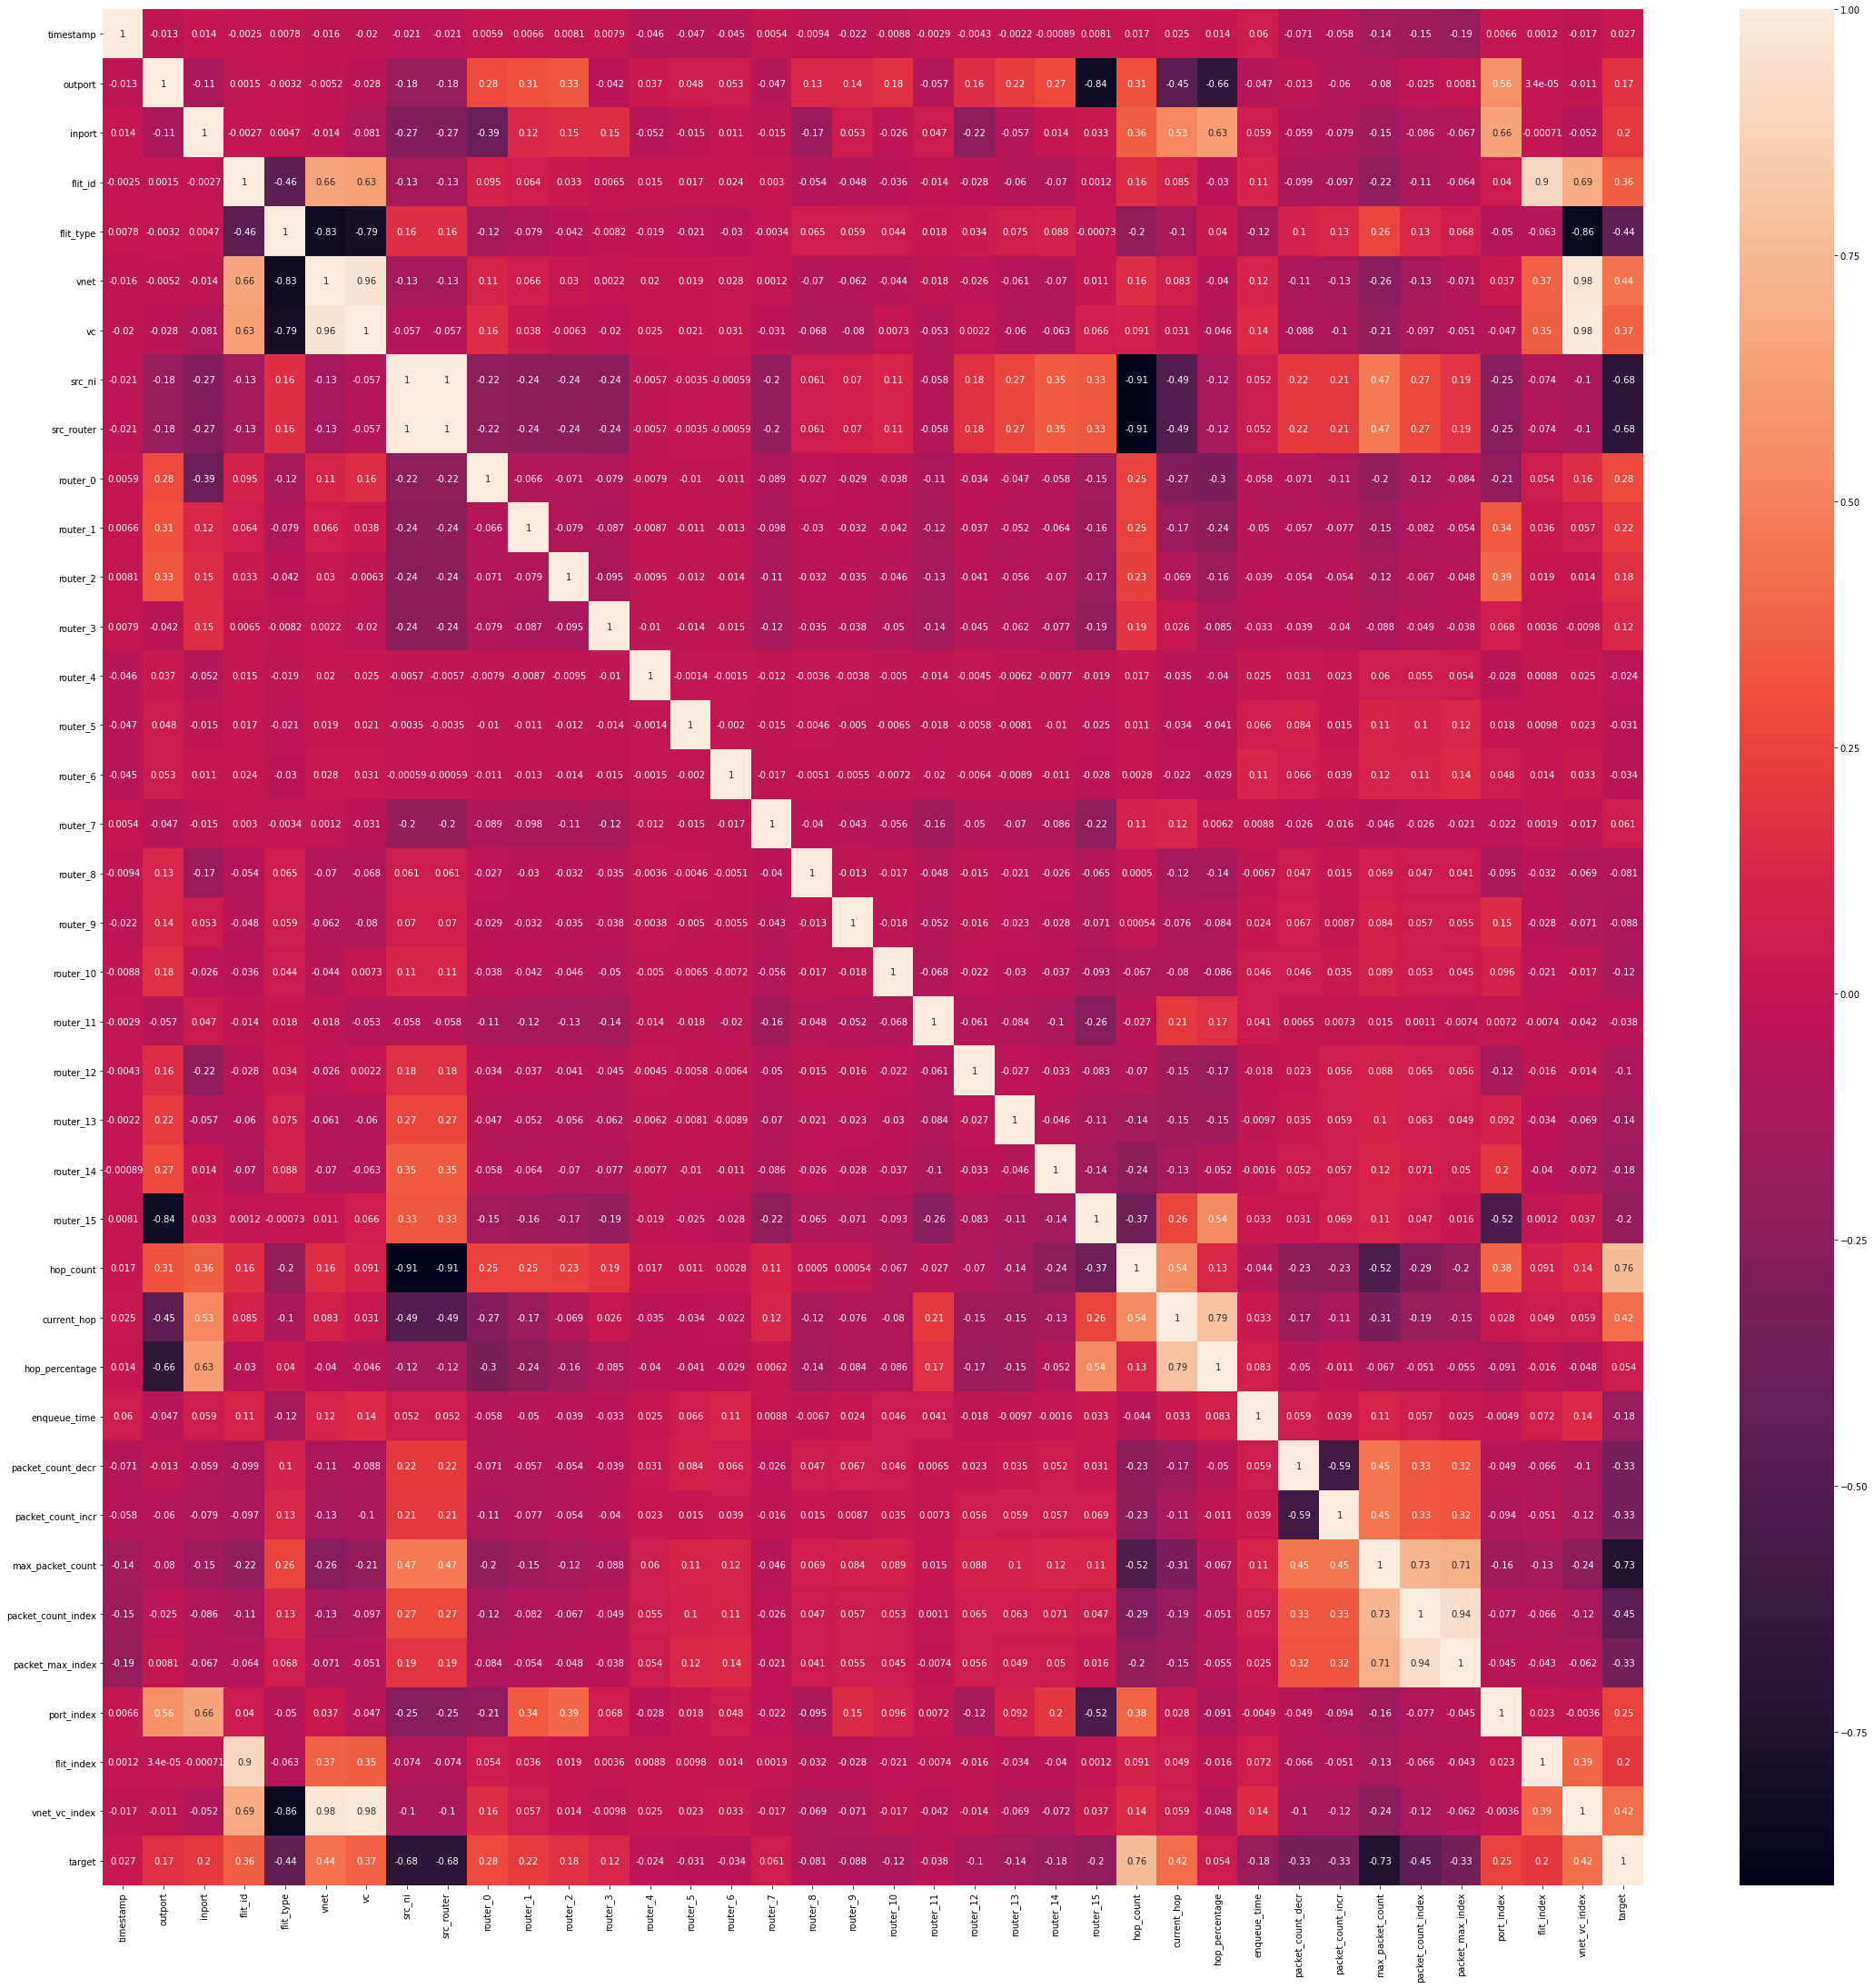

In [14]:
plt.figure(figsize=(38,38))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_index', 'vnet', 'hop_count', 'src_ni', 'packet_count_index']

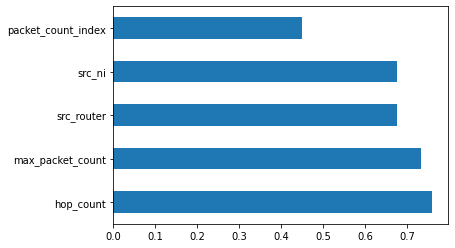

In [17]:
corr = df.corr()
linear_features=abs(corr).target.drop('target').sort_values(ascending=False)[:10].keys()
abs(corr).target.drop('target').sort_values(ascending=False)[:5].plot(kind='barh')

In [0]:
df = df.drop(columns=['src_router','src_ni'])

In [19]:
df.corr()

timestamp   outport  ...  vnet_vc_index    target
timestamp            1.000000 -0.012843  ...      -0.016920  0.026994
outport             -0.012843  1.000000  ...      -0.011059  0.174061
inport               0.013583 -0.110668  ...      -0.051585  0.204652
flit_id             -0.002483  0.001530  ...       0.687613  0.356041
flit_type            0.007823 -0.003192  ...      -0.863391 -0.443845
vnet                -0.015804 -0.005233  ...       0.975173  0.440940
vc                  -0.019843 -0.028475  ...       0.979264  0.367861
router_0             0.005869  0.278625  ...       0.155537  0.280009
router_1             0.006619  0.307709  ...       0.056544  0.222804
router_2             0.008057  0.334957  ...       0.014114  0.175348
router_3             0.007886 -0.042007  ...      -0.009777  0.122313
router_4            -0.045861  0.037060  ...       0.024719 -0.023992
router_5            -0.047106  0.047959  ...       0.023177 -0.031048
router_6            -0.044738  0.053237  ...       0.033495 -0.034465
router_7             0.005354 -0.047223  ...      -0.017036  0.060599
router_8            -0.009371  0.125294  ...      -0.069458 -0.081114
router_9            -0.022499  0.135646  ...      -0.071059 -0.087815
router_10           -0.008830  0.177690  ...      -0.017488 -0.115034
router_11           -0.002866 -0.057068  ...      -0.042070 -0.038088
router_12           -0.004348  0.158107  ...      -0.014344 -0.102356
router_13           -0.002157  0.219466  ...      -0.069488 -0.142080
router_14           -0.000887  0.271447  ...      -0.072293 -0.175731
router_15            0.008088 -0.837472  ...       0.036915 -0.202156
hop_count            0.017386  0.314870  ...       0.142422  0.758782
current_hop          0.025038 -0.451542  ...       0.059096  0.415864
hop_percentage       0.013619 -0.658517  ...      -0.048210  0.054190
enqueue_time         0.059733 -0.047482  ...       0.143827 -0.180882
packet_count_decr   -0.071206 -0.012987  ...      -0.100994 -0.332122
packet_count_incr   -0.058009 -0.059562  ...      -0.119103 -0.330466
max_packet_count    -0.142885 -0.080246  ...      -0.243400 -0.732714
packet_count_index  -0.151699 -0.024947  ...      -0.116019 -0.448775
packet_max_index    -0.187445  0.008077  ...      -0.062381 -0.334434
port_index           0.006567  0.563022  ...      -0.003583  0.250495
flit_index           0.001247  0.000034  ...       0.388112  0.202750
vnet_vc_index       -0.016920 -0.011059  ...       1.000000  0.422953
target               0.026994  0.174061  ...       0.422953  1.000000

[36 rows x 36 columns]

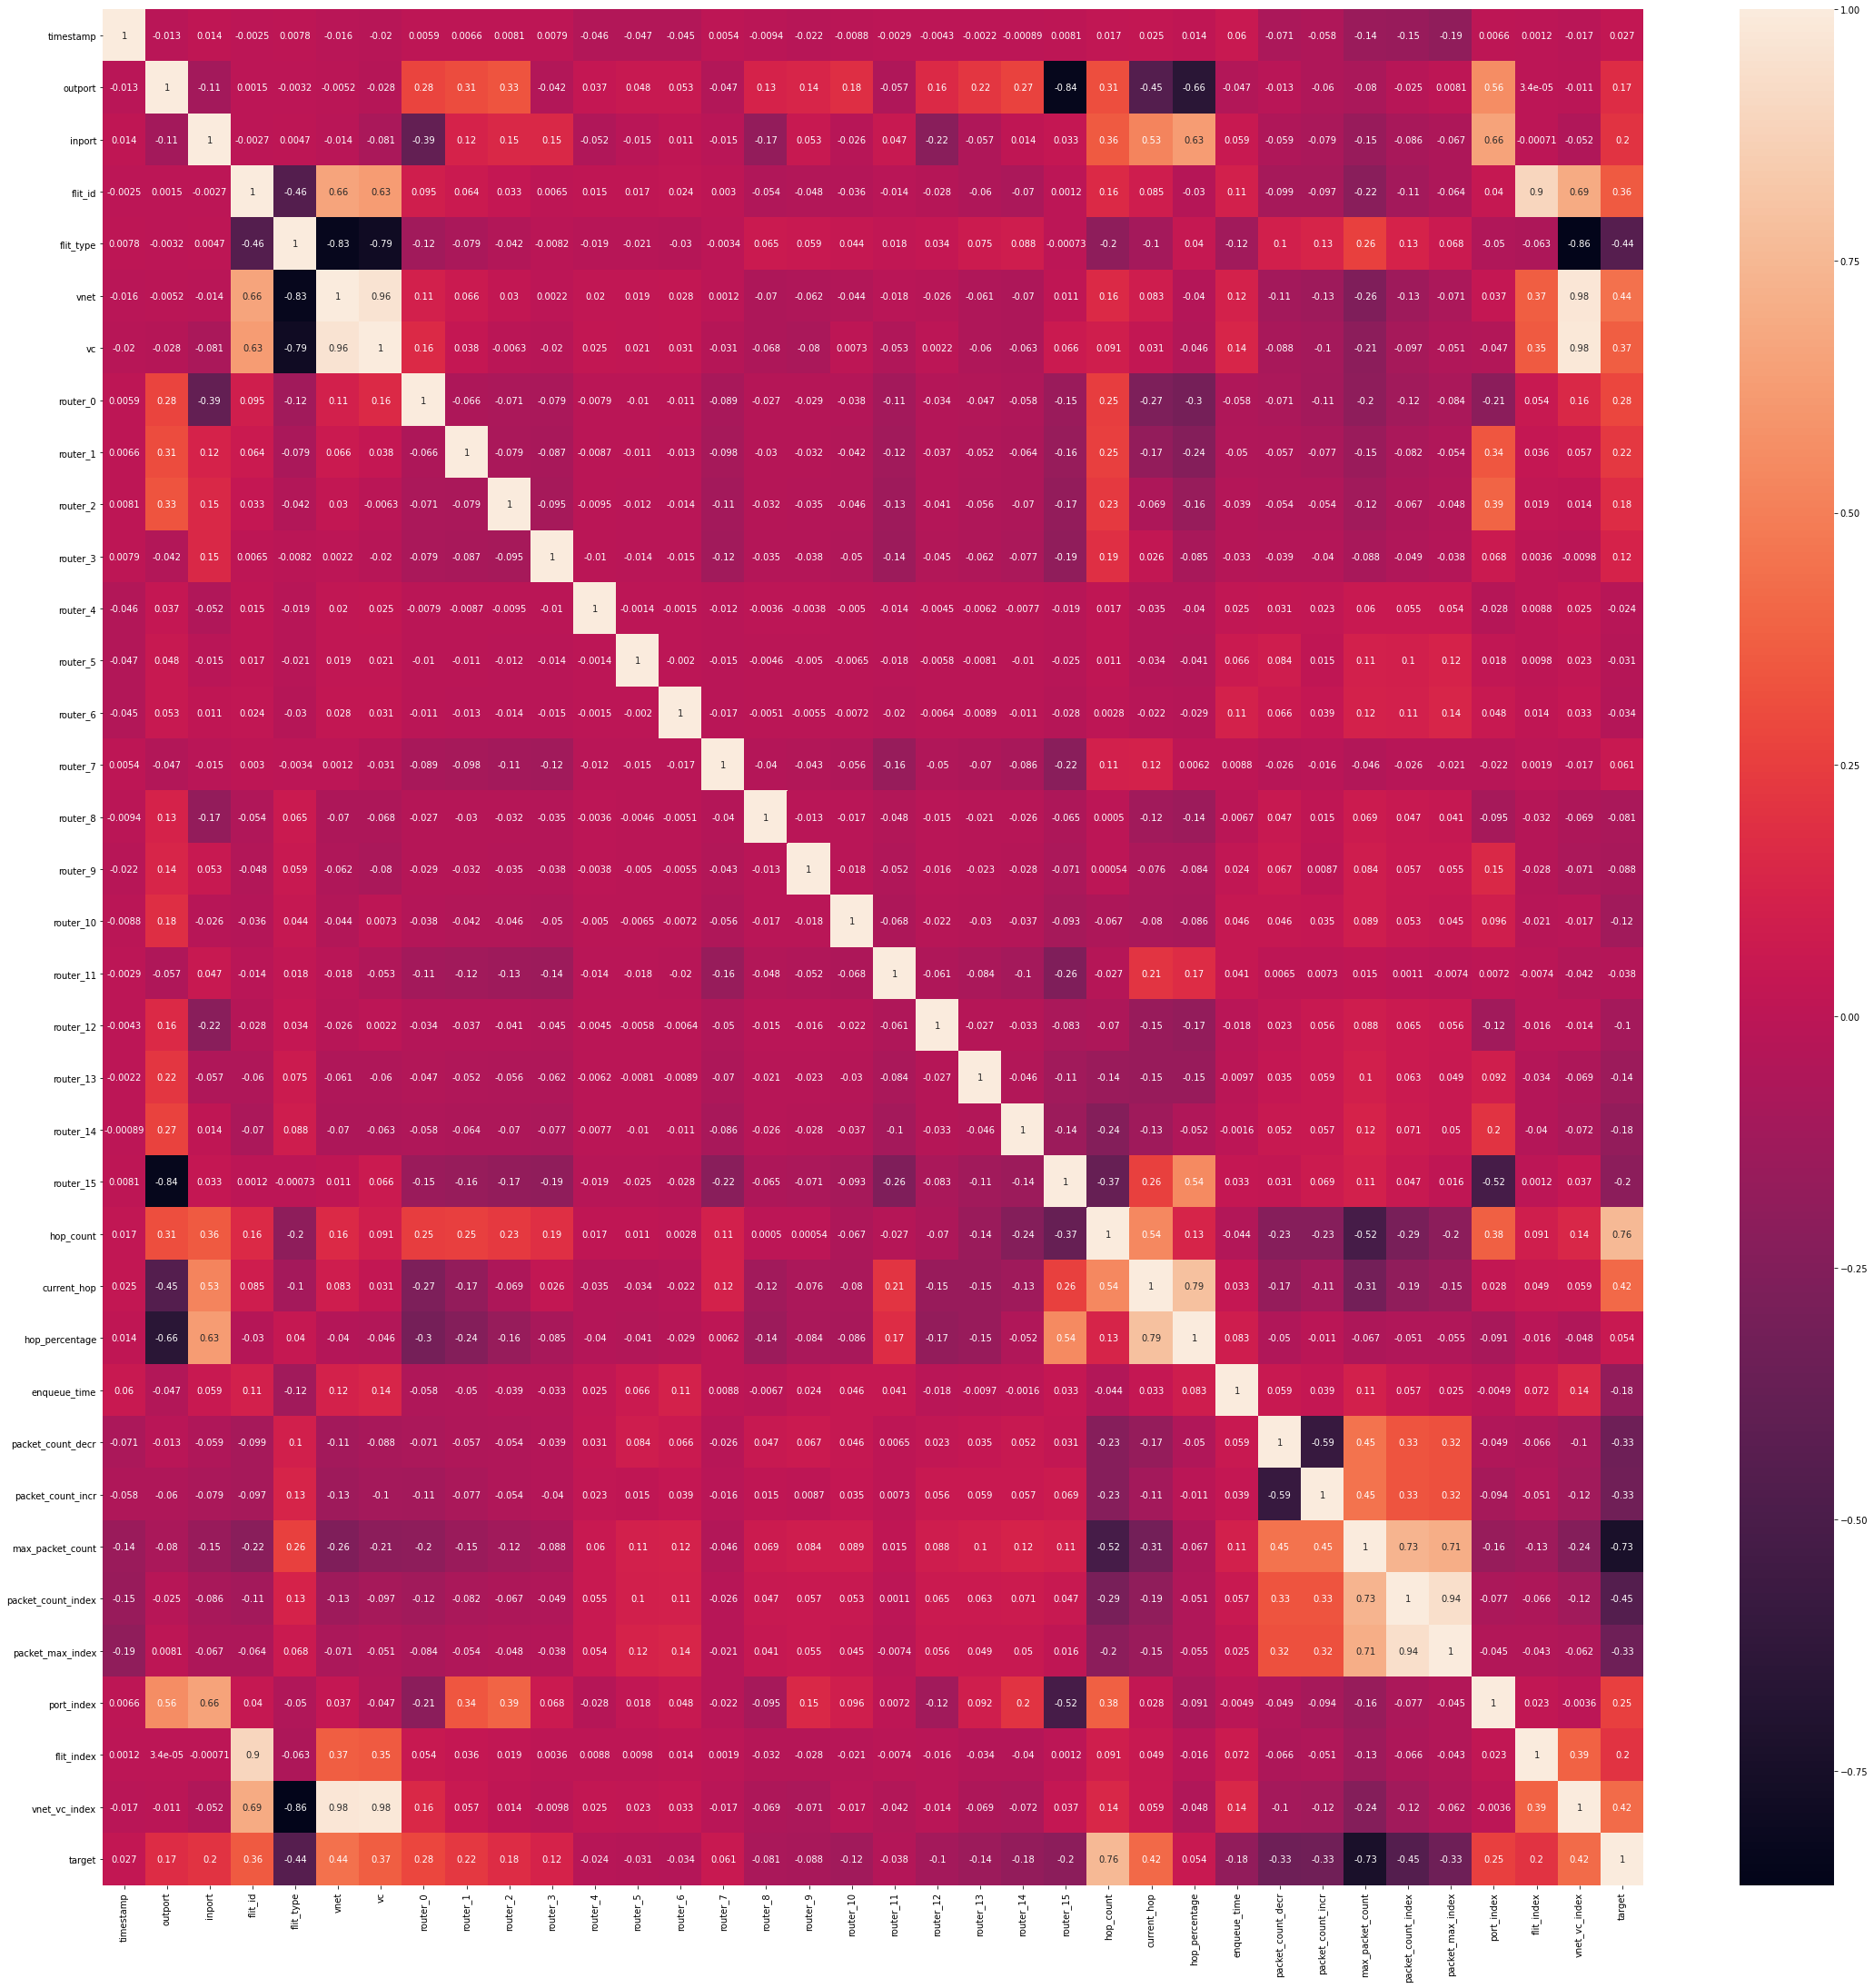

In [20]:
plt.figure(figsize=(38,38))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [21]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_index', 'vnet', 'packet_count_index']

Processing Dataset for Training

In [22]:
train_X = df.drop(columns=['target','timestamp','packet_max_index','vnet_vc_index','vc'])
train_X

outport  inport  flit_id  ...  packet_count_index  port_index  flit_index
0            2       0        1  ...                 646           0           4
1            1       0        1  ...                1290           0           4
2            1       0        1  ...                1932           0           4
3            1       0        1  ...                2572           0           4
4            2       0        1  ...                3210           0           1
...        ...     ...      ...  ...                 ...         ...         ...
46644        2       0        1  ...                8030           0           4
46645        1       4        5  ...                  94           4          15
46646        0       3        3  ...                8120           0           6
46647        2       4        4  ...                 220           8           8
46648        2       4        5  ...                  48           8          15

[46649 rows x 31 columns]

In [23]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

outport  inport  flit_id  ...  packet_count_index  port_index  flit_index
0          1.0    0.00     0.00  ...            0.005717         0.0    0.214286
1          0.5    0.00     0.00  ...            0.011873         0.0    0.214286
2          0.5    0.00     0.00  ...            0.018011         0.0    0.214286
3          0.5    0.00     0.00  ...            0.024129         0.0    0.214286
4          1.0    0.00     0.00  ...            0.030228         0.0    0.000000
...        ...     ...      ...  ...                 ...         ...         ...
46644      1.0    0.00     0.00  ...            0.076307         0.0    0.214286
46645      0.5    1.00     1.00  ...            0.000440         0.5    1.000000
46646      0.0    0.75     0.50  ...            0.077167         0.0    0.357143
46647      1.0    1.00     0.75  ...            0.001644         1.0    0.500000
46648      1.0    1.00     1.00  ...            0.000000         1.0    1.000000

[46649 rows x 31 columns]

In [24]:
train_X[train_X.duplicated()].shape

(74, 31)

In [25]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

outport    inport  ...  flit_index    target
outport             1.000000 -0.110668  ...    0.000034  0.174061
inport             -0.110668  1.000000  ...   -0.000705  0.204652
flit_id             0.001530 -0.002656  ...    0.897283  0.356041
flit_type          -0.003192  0.004710  ...   -0.063335 -0.443845
vnet               -0.005233 -0.013716  ...    0.372474  0.440940
router_0            0.278625 -0.387935  ...    0.053513  0.280009
router_1            0.307709  0.123101  ...    0.036422  0.222804
router_2            0.334957  0.154651  ...    0.018680  0.175348
router_3           -0.042007  0.154567  ...    0.003643  0.122313
router_4            0.037060 -0.051600  ...    0.008761 -0.023992
router_5            0.047959 -0.014512  ...    0.009774 -0.031048
router_6            0.053237  0.010888  ...    0.013713 -0.034465
router_7           -0.047223 -0.015301  ...    0.001873  0.060599
router_8            0.125294 -0.174449  ...   -0.031573 -0.081114
router_9            0.135646  0.052938  ...   -0.027594 -0.087815
router_10           0.177690 -0.025803  ...   -0.021078 -0.115034
router_11          -0.057068  0.047061  ...   -0.007445 -0.038088
router_12           0.158107 -0.220135  ...   -0.016331 -0.102356
router_13           0.219466 -0.057037  ...   -0.033675 -0.142080
router_14           0.271447  0.014170  ...   -0.039927 -0.175731
router_15          -0.837472  0.033314  ...    0.001189 -0.202156
hop_count           0.314870  0.356832  ...    0.090645  0.758782
current_hop        -0.451542  0.526147  ...    0.049154  0.415864
hop_percentage     -0.658517  0.626406  ...   -0.016380  0.054190
enqueue_time       -0.047482  0.059334  ...    0.072499 -0.180882
packet_count_decr  -0.012987 -0.058646  ...   -0.065861 -0.332122
packet_count_incr  -0.059562 -0.078657  ...   -0.050684 -0.330466
max_packet_count   -0.080246 -0.151843  ...   -0.128875 -0.732714
packet_count_index -0.024947 -0.085755  ...   -0.065934 -0.448775
port_index          0.563022  0.656024  ...    0.022998  0.250495
flit_index          0.000034 -0.000705  ...    1.000000  0.202750
target              0.174061  0.204652  ...    0.202750  1.000000

[32 rows x 32 columns]

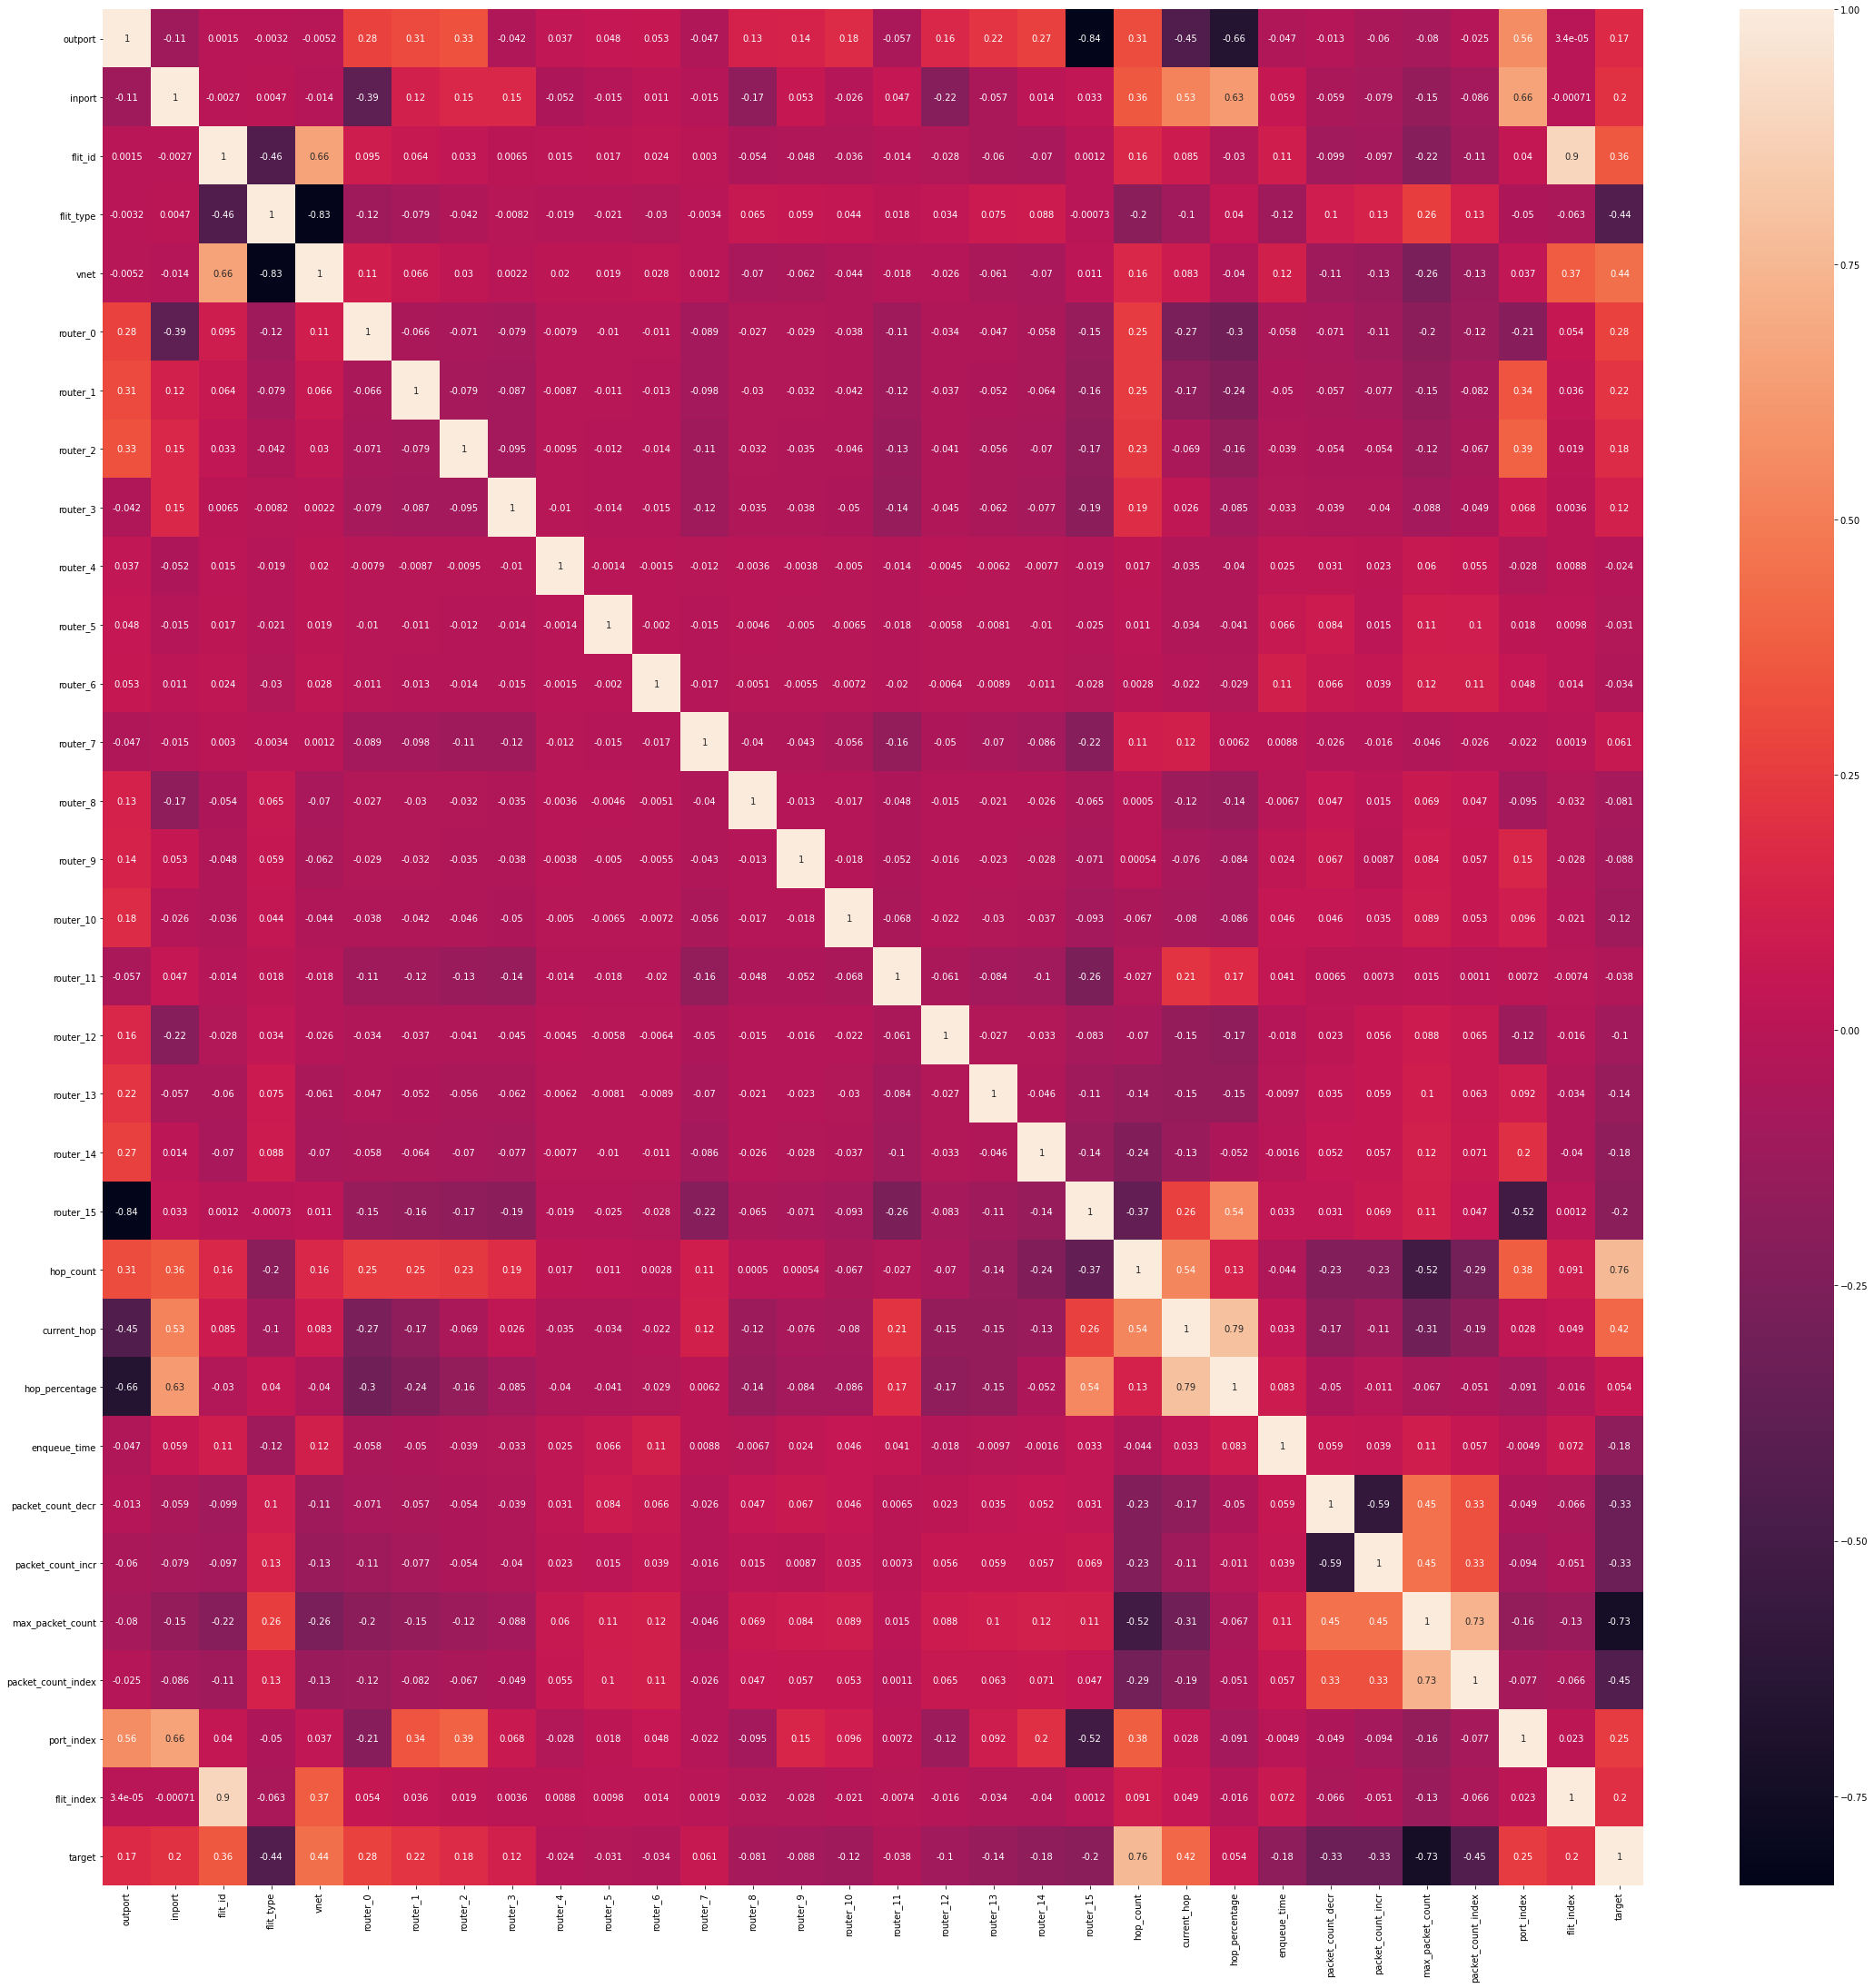

In [29]:
plt.figure(figsize=(38,38))
sns.heatmap(corr_df.corr(), annot = True)
plt.show()

In [30]:
columns_to_drop = find_correlation(corr_df.drop(columns=['target']))
columns_to_drop

[]

Principal Component Analysis

In [31]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.54115863,  0.89829214,  0.28054412, ...,  0.81283422,
         0.33720267,  0.37193911],
       [-0.17692919,  0.9825154 ,  0.28754911, ...,  0.69042629,
         0.05561322,  0.24949813],
       [-0.17686829,  0.98277291,  0.28752122, ...,  0.6885538 ,
         0.05753   ,  0.25176074],
       ...,
       [ 1.07069694, -0.39685301,  0.62622015, ...,  0.06860554,
        -0.05405643, -0.04529612],
       [-0.84622799, -1.06299769,  0.15867625, ..., -0.06721712,
        -0.16405621, -0.17494743],
       [-0.94349351, -0.97464833,  0.30407192, ..., -0.08401078,
        -0.16749889, -0.16409573]])

In [32]:
pca.explained_variance_ratio_

array([0.22108133, 0.17196422, 0.15416345, 0.07502776, 0.0619182 ,
       0.04863958, 0.04732757, 0.04335733, 0.03306468, 0.02800578,
       0.01804   , 0.01661653, 0.01378065, 0.01258551, 0.01054643])

Text(0, 0.5, 'Variance')

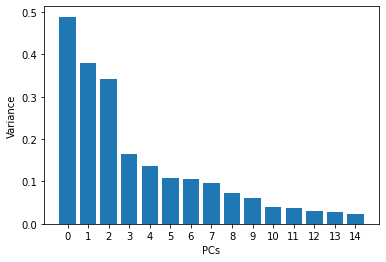

In [33]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [34]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

0         1         2   ...        12        13        14
0     -0.541159  0.898292  0.280544  ...  0.812834  0.337203  0.371939
1     -0.176929  0.982515  0.287549  ...  0.690426  0.055613  0.249498
2     -0.176868  0.982773  0.287521  ...  0.688554  0.057530  0.251761
3     -0.176808  0.983030  0.287493  ...  0.686681  0.059442  0.254016
4     -0.604796  0.388923  0.892966  ...  0.805001  0.396038  0.423811
...         ...       ...       ...  ...       ...       ...       ...
46644 -0.519922  0.918097  0.342300  ...  0.224932  0.556650 -0.762638
46645 -0.229797 -1.017993  0.329692  ... -0.058178 -0.147823 -0.192750
46646  1.070697 -0.396853  0.626220  ...  0.068606 -0.054056 -0.045296
46647 -0.846228 -1.062998  0.158676  ... -0.067217 -0.164056 -0.174947
46648 -0.943494 -0.974648  0.304072  ... -0.084011 -0.167499 -0.164096

[46649 rows x 15 columns]

In [35]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

0             1  ...            14    target
0       1.000000e+00  1.142486e-15  ... -2.749101e-15 -0.218026
1       1.142486e-15  1.000000e+00  ...  2.643803e-15 -0.626104
2       1.433623e-15  2.292493e-15  ...  2.097987e-15  0.140805
3      -2.082182e-15  6.477505e-16  ...  4.816283e-16  0.028955
4      -1.379220e-15  1.415117e-15  ... -1.989197e-16  0.353622
5      -1.790644e-16 -9.853996e-16  ... -4.127201e-16 -0.295309
6       1.570527e-16 -3.880410e-16  ...  4.351791e-17 -0.095415
7      -4.529753e-16 -3.457352e-16  ... -8.737741e-16 -0.207049
8       2.370618e-15 -5.070002e-16  ... -2.836944e-16  0.062484
9      -1.168277e-15  3.632612e-17  ...  3.769991e-16 -0.006163
10     -1.174341e-15 -5.397327e-16  ...  2.288939e-17 -0.086365
11     -9.595068e-16  9.656885e-16  ... -3.101884e-16 -0.020017
12     -1.215096e-16  7.363546e-16  ...  7.046201e-16 -0.031809
13     -1.361078e-16  1.183446e-15  ...  1.899003e-16 -0.192947
14     -2.749101e-15  2.643803e-15  ...  1.000000e+00 -0.164602
target -2.180257e-01 -6.261036e-01  ... -1.646022e-01  1.000000

[16 rows x 16 columns]

In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

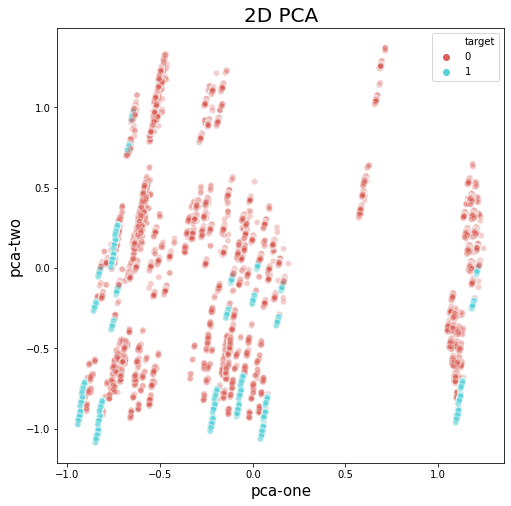

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

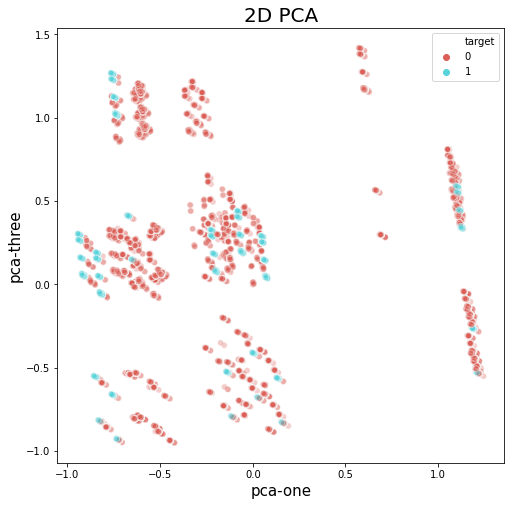

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

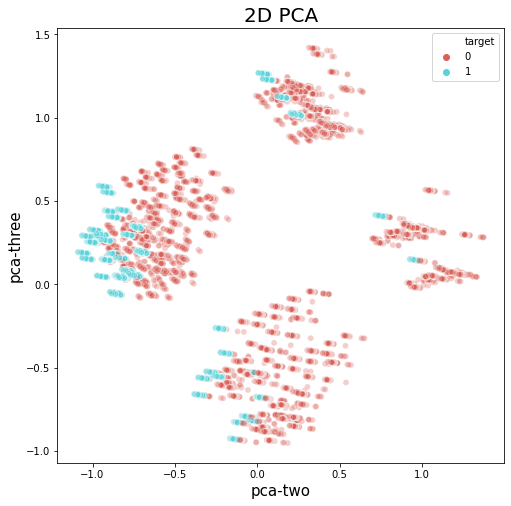

In [39]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

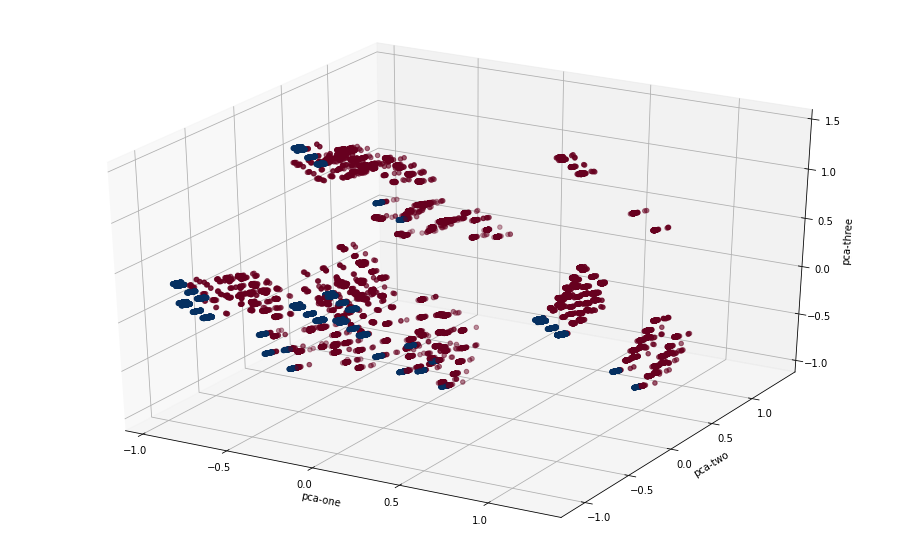

In [40]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

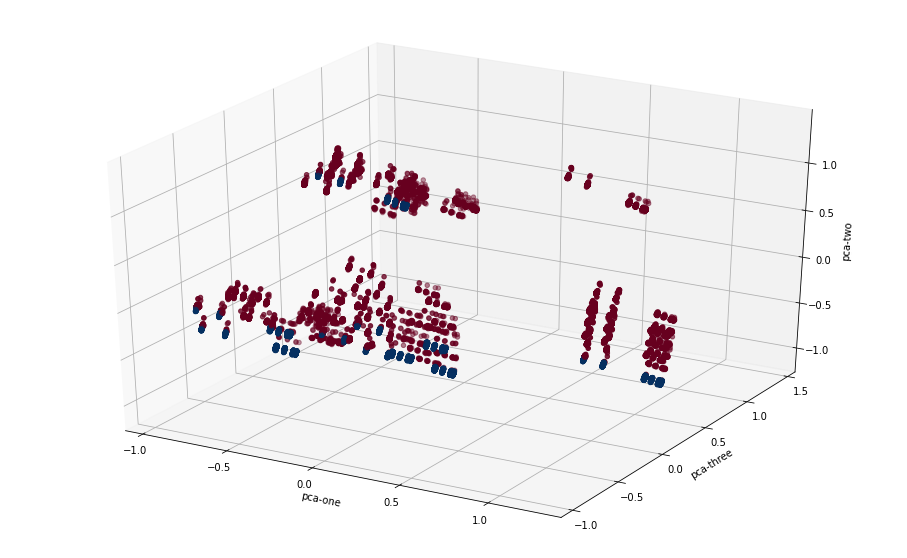

In [41]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

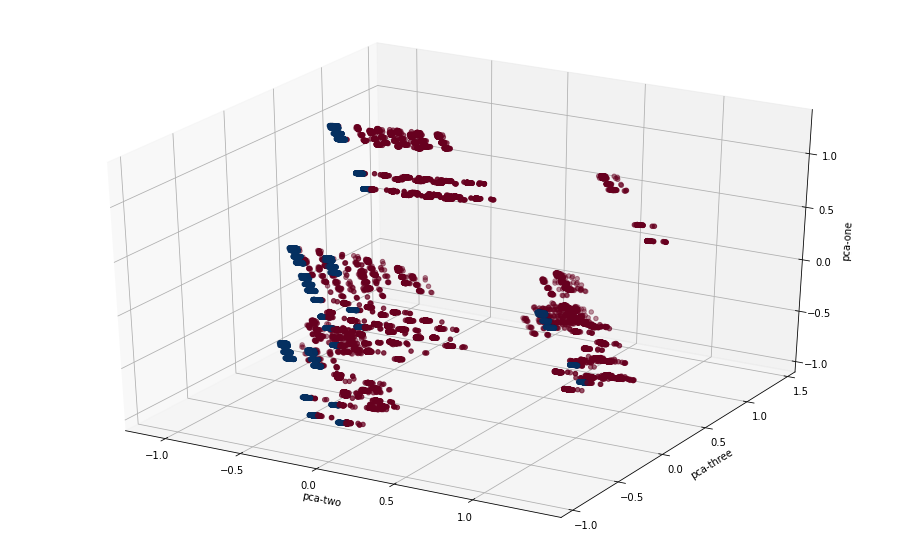

In [42]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [43]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 183.56980657577515 seconds


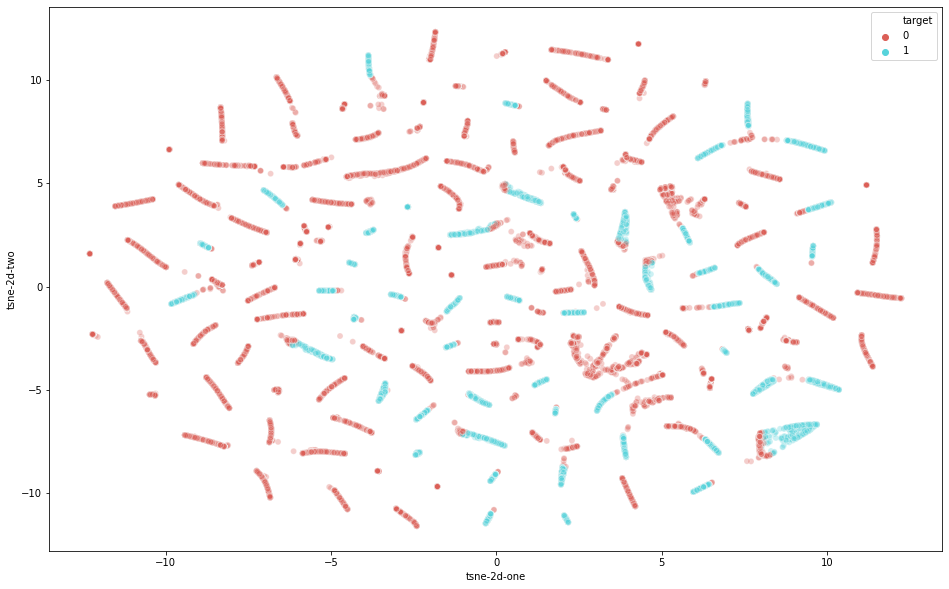

In [44]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

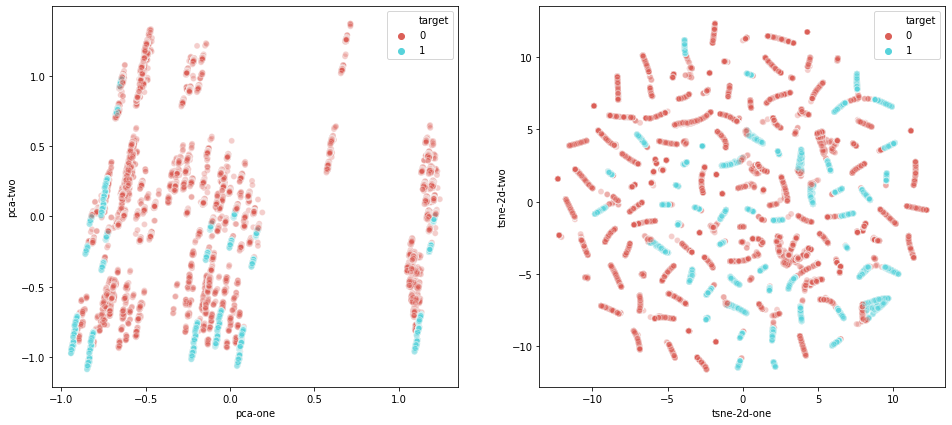

In [45]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [46]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 148.14654731750488 seconds


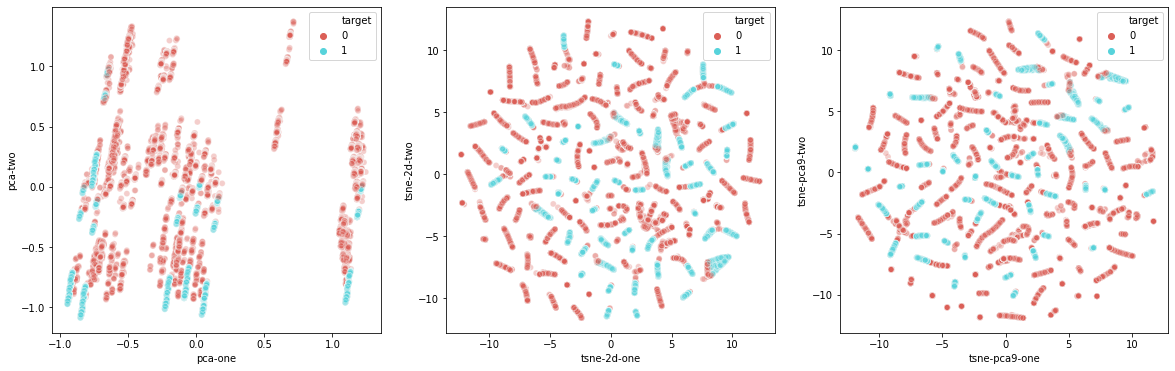

In [47]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [49]:
train_Y = df['target']
train_Y.value_counts()

0    30146
1    16503
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs        Score
21           hop_count  3448.033124
5             router_0  2751.858396
2              flit_id  2646.621334
4                 vnet  2498.104090
22         current_hop  1788.773882
6             router_1  1734.902258
3            flit_type  1244.942078
19           router_14  1087.050902
20           router_15  1082.196017
7             router_2  1047.953276
29          port_index  1024.871869
27    max_packet_count  1012.807411
18           router_13   730.182452
28  packet_count_index   664.496706
8             router_3   504.144999
15           router_10   479.661896
1               inport   395.311847


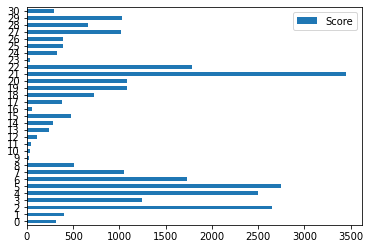

In [52]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [55]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 99.74811758085693
Test Prediction  99.66773847802787


In [57]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

feature  importance
21           hop_count   17.664546
22         current_hop   10.786922
5             router_0    6.142105
4                 vnet    3.780727
0              outport    3.222395
6             router_1    2.935286
29          port_index    2.037107
8             router_3    1.390882
23      hop_percentage    1.031479
7             router_2    0.850134
30          flit_index    0.592222
2              flit_id    0.227196
17           router_12   -0.002084
13            router_8   -0.018342
9             router_4   -0.042597
18           router_13   -0.292566
10            router_5   -0.484446
1               inport   -0.518282
12            router_7   -0.523453
14            router_9   -0.609450
19           router_14   -1.172234
15           router_10   -1.348389
3            flit_type   -1.711449
11            router_6   -1.837745
20           router_15   -2.316364
16           router_11   -2.661985
28  packet_count_index   -5.804904
26   packet_count_incr  -11.356436
25   packet_count_decr  -12.735654
24        enqueue_time  -16.535060
27    max_packet_count  -25.986303

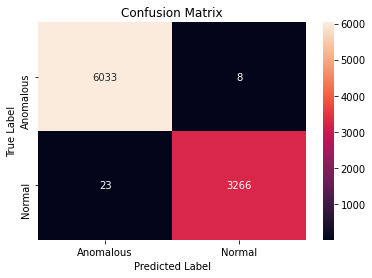

In [58]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       1.00      0.99      1.00      3289

    accuracy                           1.00      9330
   macro avg       1.00      1.00      1.00      9330
weighted avg       1.00      1.00      1.00      9330



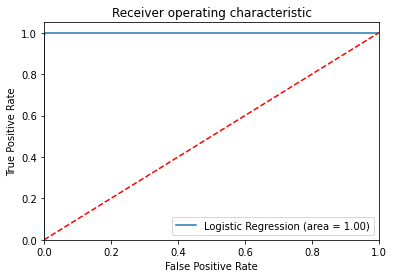

In [60]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [61]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [63]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 99.59002116884162
Test Prediction  99.41050375133976


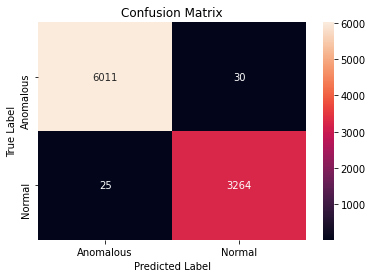

In [64]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [65]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       0.99      0.99      0.99      3289

    accuracy                           0.99      9330
   macro avg       0.99      0.99      0.99      9330
weighted avg       0.99      0.99      0.99      9330



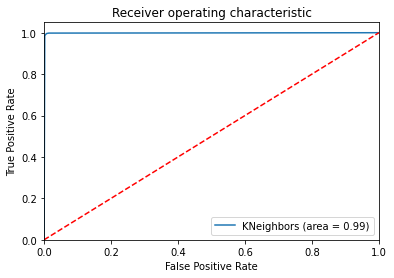

In [66]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [68]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [70]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 98.50478308636352
Test Prediction Score 98.63879957127546


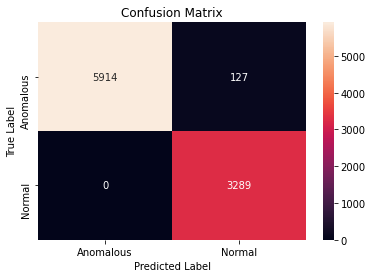

In [71]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [72]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6041
           1       0.96      1.00      0.98      3289

    accuracy                           0.99      9330
   macro avg       0.98      0.99      0.99      9330
weighted avg       0.99      0.99      0.99      9330



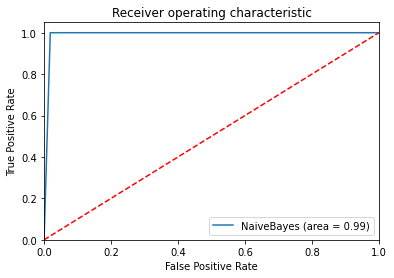

In [73]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [74]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [75]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 29855 samples, validate on 7464 samples
Epoch 1/10
29855/29855 [==============================] - 1s 40us/step - loss: 0.0922 - accuracy: 0.9300 - val_loss: 0.0310 - val_accuracy: 0.9885
Epoch 2/10
29855/29855 [==============================] - 1s 37us/step - loss: 0.0198 - accuracy: 0.9918 - val_loss: 0.0147 - val_accuracy: 0.9945
Epoch 3/10
29855/29855 [==============================] - 1s 37us/step - loss: 0.0112 - accuracy: 0.9944 - val_loss: 0.0099 - val_accuracy: 0.9946
Epoch 4/10
29855/29855 [==============================] - 1s 37us/step - loss: 0.0082 - accuracy: 0.9952 - val_loss: 0.0082 - val_accuracy: 0.9954
Epoch 5/10
29855/29855 [==============================] - 1s 36us/step - loss: 0.0066 - accuracy: 0.9954 - val_loss: 0.0065 - val_accuracy: 0.9957
Epoch 6/10
29855/29855 [==============================] - 1s 36us/step - loss: 0.0056 - accuracy: 0.9959 - val_loss: 0.0058 - val_accuracy: 0.9968
Epoch 7/10
29855/29855 [==============================] - 1s 37us/ste

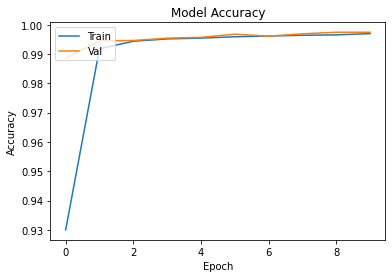

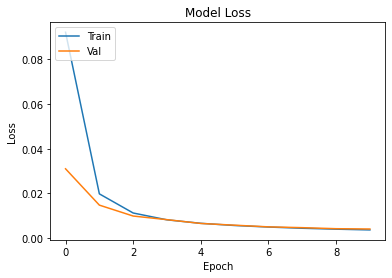

In [76]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [77]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.68%


3-Layer Neural Network

In [78]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 29855 samples, validate on 7464 samples
Epoch 1/15
29855/29855 [==============================] - 1s 37us/step - loss: 0.2311 - accuracy: 0.6340 - val_loss: 0.2215 - val_accuracy: 0.6438
Epoch 2/15
29855/29855 [==============================] - 1s 36us/step - loss: 0.2125 - accuracy: 0.6468 - val_loss: 0.2009 - val_accuracy: 0.6557
Epoch 3/15
29855/29855 [==============================] - 1s 36us/step - loss: 0.1717 - accuracy: 0.7479 - val_loss: 0.1273 - val_accuracy: 0.8826
Epoch 4/15
29855/29855 [==============================] - 1s 36us/step - loss: 0.0902 - accuracy: 0.9029 - val_loss: 0.0609 - val_accuracy: 0.9385
Epoch 5/15
29855/29855 [==============================] - 1s 36us/step - loss: 0.0461 - accuracy: 0.9624 - val_loss: 0.0351 - val_accuracy: 0.9814
Epoch 6/15
29855/29855 [==============================] - 1s 36us/step - loss: 0.0287 - accuracy: 0.9840 - val_loss: 0.0243 - val_accuracy: 0.9890
Epoch 7/15
29855/29855 [==============================] - 1s 36us/ste

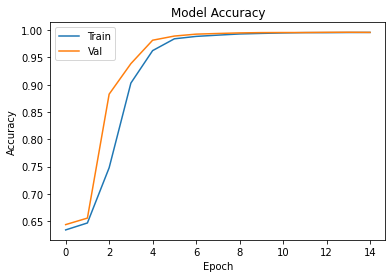

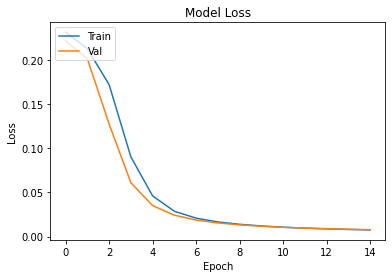

In [79]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [80]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.45%


4-Layer Neural Network



In [81]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 29855 samples, validate on 7464 samples
Epoch 1/30
29855/29855 [==============================] - 1s 40us/step - loss: 0.2140 - accuracy: 0.6464 - val_loss: 0.1837 - val_accuracy: 0.6442
Epoch 2/30
29855/29855 [==============================] - 1s 38us/step - loss: 0.1499 - accuracy: 0.7653 - val_loss: 0.1213 - val_accuracy: 0.8987
Epoch 3/30
29855/29855 [==============================] - 1s 38us/step - loss: 0.0960 - accuracy: 0.9243 - val_loss: 0.0757 - val_accuracy: 0.9452
Epoch 4/30
29855/29855 [==============================] - 1s 38us/step - loss: 0.0598 - accuracy: 0.9755 - val_loss: 0.0488 - val_accuracy: 0.9885
Epoch 5/30
29855/29855 [==============================] - 1s 38us/step - loss: 0.0402 - accuracy: 0.9913 - val_loss: 0.0348 - val_accuracy: 0.9938
Epoch 6/30
29855/29855 [==============================] - 1s 38us/step - loss: 0.0297 - accuracy: 0.9940 - val_loss: 0.0270 - val_accuracy: 0.9948
Epoch 7/30
29855/29855 [==============================] - 1s 37us/ste

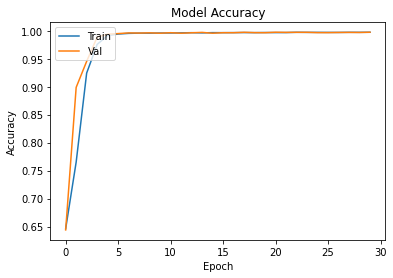

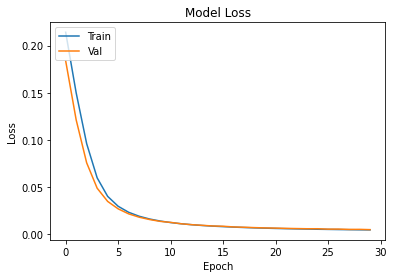

In [82]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [83]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.64%


5-Layer Neural Network Optimized

In [84]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 29855 samples, validate on 7464 samples
Epoch 1/100
29855/29855 [==============================] - 2s 82us/step - loss: 0.0246 - accuracy: 0.9721 - val_loss: 0.0075 - val_accuracy: 0.9914
Epoch 2/100
29855/29855 [==============================] - 2s 66us/step - loss: 0.0099 - accuracy: 0.9875 - val_loss: 0.0048 - val_accuracy: 0.9936
Epoch 3/100
29855/29855 [==============================] - 2s 66us/step - loss: 0.0075 - accuracy: 0.9907 - val_loss: 0.0049 - val_accuracy: 0.9936
Epoch 4/100
29855/29855 [==============================] - 2s 67us/step - loss: 0.0068 - accuracy: 0.9915 - val_loss: 0.0032 - val_accuracy: 0.9961
Epoch 5/100
29855/29855 [==============================] - 2s 66us/step - loss: 0.0053 - accuracy: 0.9933 - val_loss: 0.0031 - val_accuracy: 0.9965
Epoch 6/100
29855/29855 [==============================] - 2s 66us/step - loss: 0.0062 - accuracy: 0.9921 - val_loss: 0.0037 - val_accuracy: 0.9952
Epoch 7/100
29855/29855 [==============================] - 2s 6

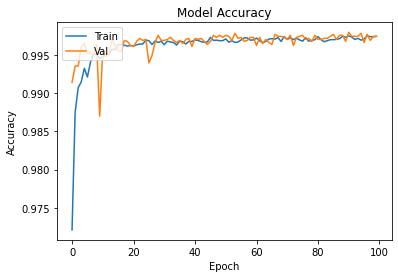

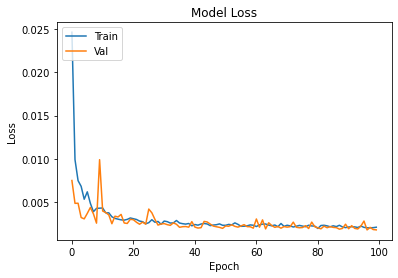

In [85]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [86]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 99.71%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [88]:
# GridSearchCV
param_grid={'max_depth':range(0,30,2) ,
            'max_features':range(0,30,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 28}
Accuracy : 0.99994640943194


In [89]:
dt = DecisionTreeClassifier(max_depth=30,max_features=30,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [91]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.989281886388


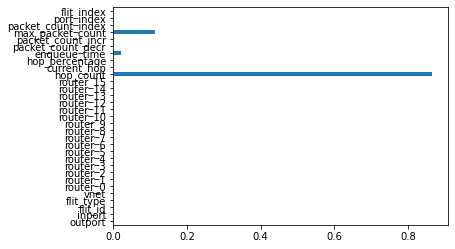

In [92]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

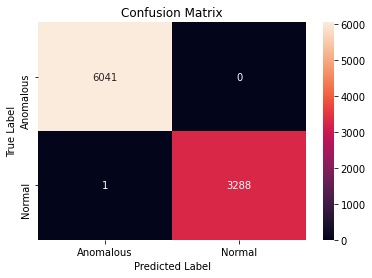

In [93]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [94]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       1.00      1.00      1.00      3289

    accuracy                           1.00      9330
   macro avg       1.00      1.00      1.00      9330
weighted avg       1.00      1.00      1.00      9330



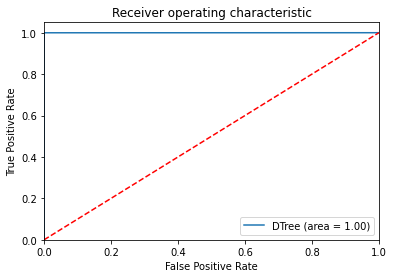

In [95]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,30,2),
            'n_estimators':[125,250],
            'max_features':range(0,25,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [98]:
rf = RandomForestClassifier(max_depth=30,max_features=30,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=30,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [100]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.989281886388


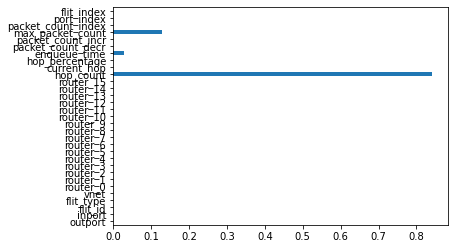

In [101]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

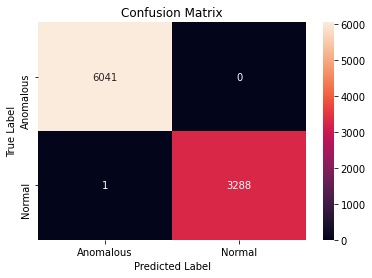

In [102]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [103]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       1.00      1.00      1.00      3289

    accuracy                           1.00      9330
   macro avg       1.00      1.00      1.00      9330
weighted avg       1.00      1.00      1.00      9330



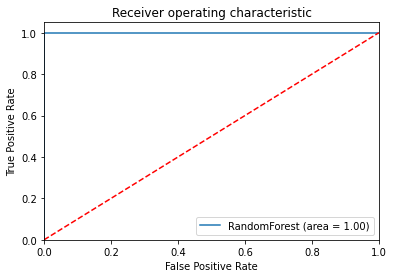

In [104]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250,500],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [106]:
xgbc = XGBClassifier(max_depth=30,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [108]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.978563772776


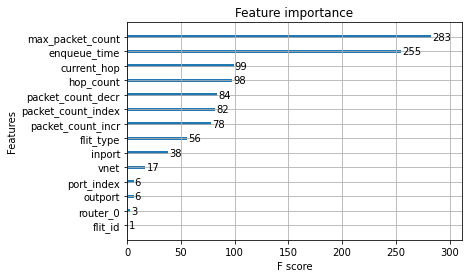

In [109]:
plot_importance(xgbc)
plt.show()

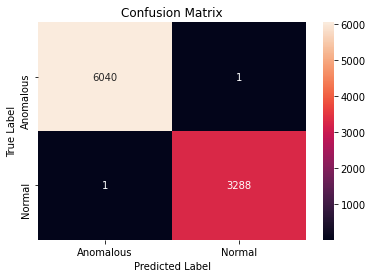

In [110]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [111]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       1.00      1.00      1.00      3289

    accuracy                           1.00      9330
   macro avg       1.00      1.00      1.00      9330
weighted avg       1.00      1.00      1.00      9330



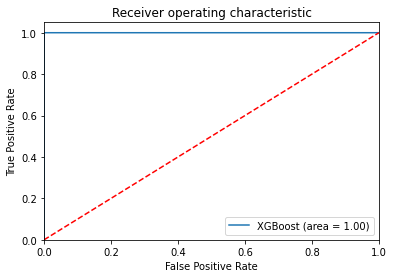

In [112]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

In [114]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 30, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=30,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [116]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.989281886388


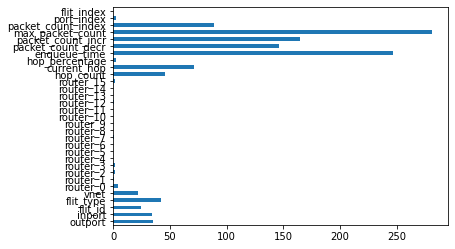

In [117]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

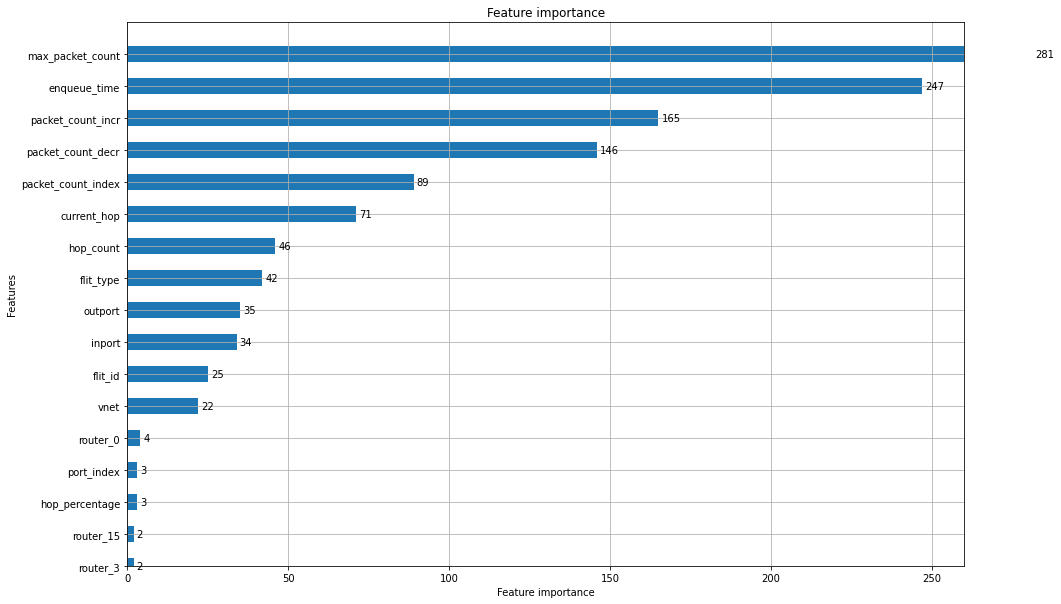

In [118]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,260), ylim = (0,17), figsize = (15,10))
plt.show()

In [119]:
sorted(gbm.feature_importances_,reverse=True)

[281,
 247,
 165,
 146,
 89,
 71,
 46,
 42,
 35,
 34,
 25,
 22,
 4,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

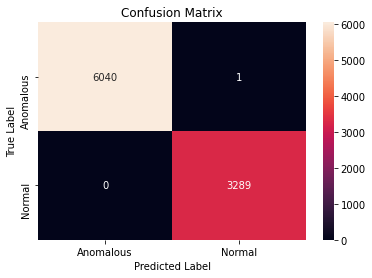

In [120]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [121]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6041
           1       1.00      1.00      1.00      3289

    accuracy                           1.00      9330
   macro avg       1.00      1.00      1.00      9330
weighted avg       1.00      1.00      1.00      9330



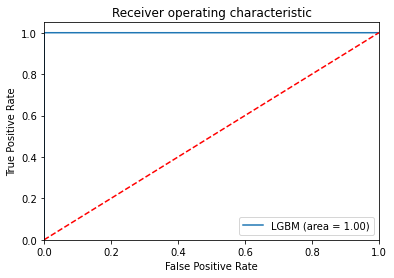

In [122]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()